### 주식 정보 크롤링

- https://github.com/financedata-org/FinanceDataReader
- pip install finance-datareader

In [1]:
!pip install finance-datareader

     ---------------------------------------- 3.8/3.8 MB 16.0 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00


https://github.com/financedata-org/FinanceDataReader 를 참조해서 삼성전자의 2010년부터 현재까지의 주식가격을 크롤링해서 그래프로 그려주는 파이썬 코드를 작성해줘

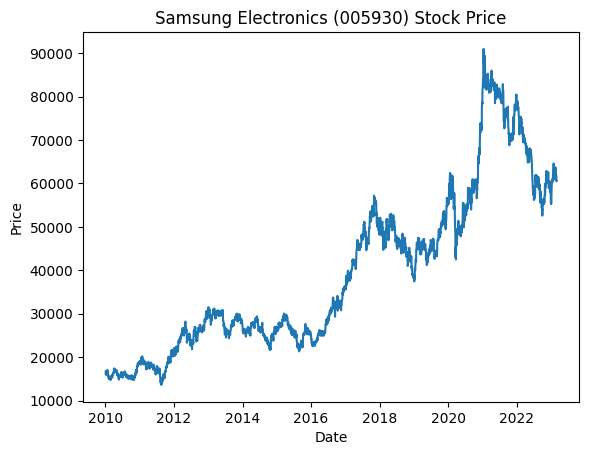

In [3]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

samsung = fdr.DataReader('005930', '2010-01-01', '2023-03-01')

plt.plot(samsung['Close'])
plt.title('Samsung Electronics (005930) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


삼성전자의 종가를 기준으로 가격변화 그래프를 그려줘

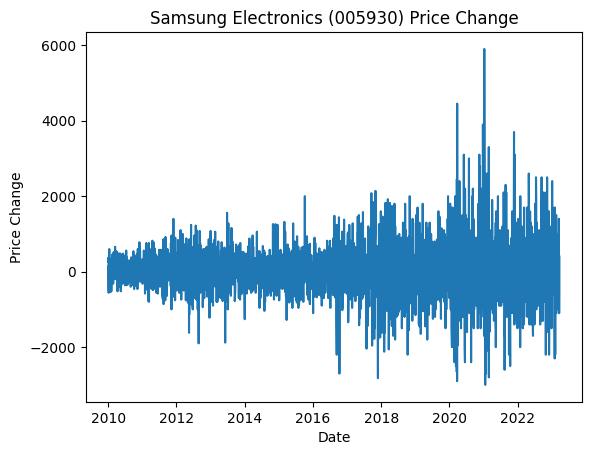

In [4]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Calculate the daily price change based on the closing price
samsung['Price Change'] = samsung['Close'].diff()

# Plot the price change graph
plt.plot(samsung.index, samsung['Price Change'])
plt.title('Samsung Electronics (005930) Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()


삼성전자가 가장 높은 가격이였던 날은 언제야? 

In [5]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Find the date when the highest price occurred
highest_price_date = samsung['Close'].idxmax()

print('The last time Samsung Electronics had the highest price was on', highest_price_date)


The last time Samsung Electronics had the highest price was on 2021-01-11 00:00:00


In [6]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Find the highest price and its corresponding date
highest_price = samsung['Close'].max()
highest_price_date = samsung['Close'].idxmax()

print('Samsung Electronics\' highest stock price was', highest_price, 'on', highest_price_date)


Samsung Electronics' highest stock price was 91000 on 2021-01-11 00:00:00


삼성전자 주가 데이터를 csv파일로 저장해줘

In [7]:
import FinanceDataReader as fdr

# Retrieve the historical stock prices of Samsung Electronics from 2010 to the present day
samsung = fdr.DataReader('005930', '2010-01-01')

# Save the data as a CSV file
samsung.to_csv('samsung_stock_prices.csv')


삼성전자와 LG전자의 2015년부터 현재까지 주가를 크롤링해서 그래프로 작성하고 csv 파일로 젖아해주는 파이썬 코드를 작성해줘

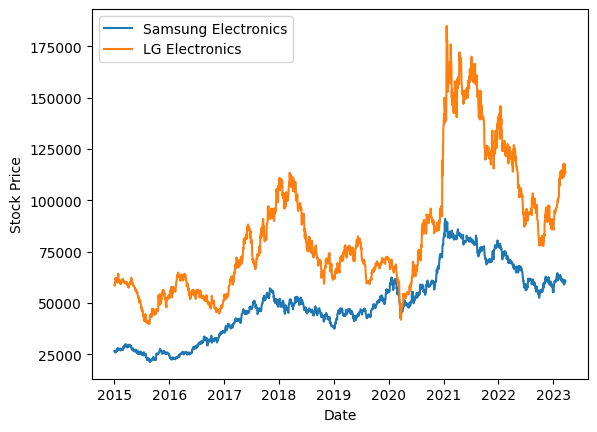

In [8]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# Retrieve the historical stock prices of Samsung Electronics and LG Electronics from 2015 to the present day
samsung = fdr.DataReader('005930', '2015-01-01')
lg = fdr.DataReader('066570', '2015-01-01')

# Plot the stock prices of Samsung Electronics and LG Electronics
plt.plot(samsung.index, samsung['Close'], label='Samsung Electronics')
plt.plot(lg.index, lg['Close'], label='LG Electronics')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Save the plot as a PNG file
plt.savefig('samsung_lg_stock_prices.png')

# Save the data as a CSV file
samsung_lg = samsung.join(lg, lsuffix='_samsung', rsuffix='_lg')
samsung_lg.to_csv('samsung_lg_stock_prices.csv')


삼성전자우, NH투자증권우, 하나투어, 제너셈, 카카오뱅크 주가에 대해 20일 이동평균선에 대해 그래프를 그리는 파이썬 프로그램 작성해줘

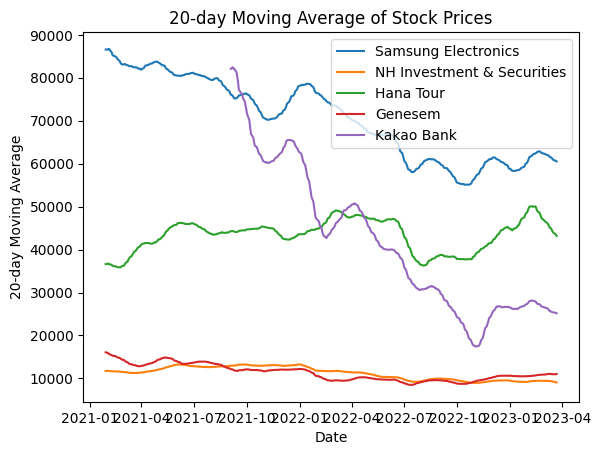

In [14]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# Set the start and end dates for the stock prices
start_date = '2021-01-01'
end_date = '2023-03-22'

# Set the list of tickers for the companies
tickers = ['005930', '005940', '086790', '263690', '323410']

# Create an empty dataframe to store the stock prices for each company
df = pd.DataFrame()

# Loop through the list of tickers and append the stock prices to the dataframe
for ticker in tickers:
    stock_df = fdr.DataReader(ticker, start_date, end_date)
    df[ticker] = stock_df['Close']

# Calculate the 20-day moving average for each company
ma_df = df.rolling(window=20).mean()

# Plot the 20-day moving average for each company
plt.plot(ma_df.index, ma_df['005930'], label='Samsung Electronics')
plt.plot(ma_df.index, ma_df['005940'], label='NH Investment & Securities')
plt.plot(ma_df.index, ma_df['086790'], label='Hana Tour')
plt.plot(ma_df.index, ma_df['263690'], label='Genesem')
plt.plot(ma_df.index, ma_df['323410'], label='Kakao Bank')

plt.xlabel('Date')
plt.ylabel('20-day Moving Average')
plt.title('20-day Moving Average of Stock Prices')
plt.legend()
plt.show()



위의 프로그램의 데이터를 csv 파일로 저장해줘

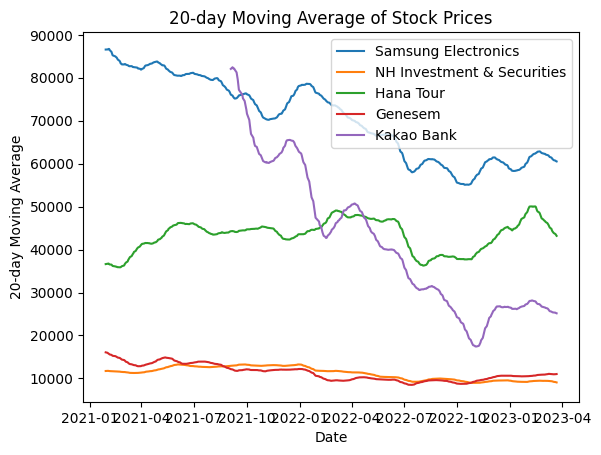

In [15]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# Set the start and end dates for the stock prices
start_date = '2021-01-01'
end_date = '2023-03-22'

# Set the list of tickers for the companies
tickers = ['005930', '005940', '086790', '263690', '323410']

# Create an empty dataframe to store the stock prices for each company
df = pd.DataFrame()

# Loop through the list of tickers and append the stock prices to the dataframe
for ticker in tickers:
    stock_df = fdr.DataReader(ticker, start_date, end_date)
    df[ticker] = stock_df['Close']

# Calculate the 20-day moving average for each company
ma_df = df.rolling(window=20).mean()

# Save the data to a CSV file
ma_df.to_csv('moving_average.csv', index=True)

# Plot the 20-day moving average for each company
plt.plot(ma_df.index, ma_df['005930'], label='Samsung Electronics')
plt.plot(ma_df.index, ma_df['005940'], label='NH Investment & Securities')
plt.plot(ma_df.index, ma_df['086790'], label='Hana Tour')
plt.plot(ma_df.index, ma_df['263690'], label='Genesem')
plt.plot(ma_df.index, ma_df['323410'], label='Kakao Bank')

plt.xlabel('Date')
plt.ylabel('20-day Moving Average')
plt.title('20-day Moving Average of Stock Prices')
plt.legend()
plt.show()
